In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [377]:
G = 6.67430e-11  #gravity
M_sun = 1.989e30 #mass of sun 
AU = 1.082089e11   #Astro unit for venus
distance = 0.72 * AU
dt = 60 * 60 * 24.0  # hours converted to seconds

In [379]:
# mass of Venus in kg 
mass_venus =  4.87e24
distance_from_sun = 108.2e6 * 1e3 #converting to meters
venus_perihelion = 107.5e6 * 1e3 #converting to meters

In [381]:
initial_velocity = np.sqrt(G*M_sun*((2/venus_perihelion)-(1/distance)))
print("initial velocity = ",initial_velocity, "m/s")

initial velocity =  27674.858674163228 m/s


In [383]:
position = np.array([distance, 0], dtype=float)  # starts at 0.72 AU
velocity = np.array([0, initial_velocity], dtype=float)  # inital velocity 

In [385]:
# Lists to store position data for plotting
x_positions = []
y_positions = []

In [387]:
# Function to calculate gravitational force
def gravitational_force(position):
    r = np.linalg.norm(position)  # Distance to Sun
    force_magnitude = G * M_sun * mass_venus / distance_from_sun
    force_direction = -position / r
    return force_magnitude * force_direction

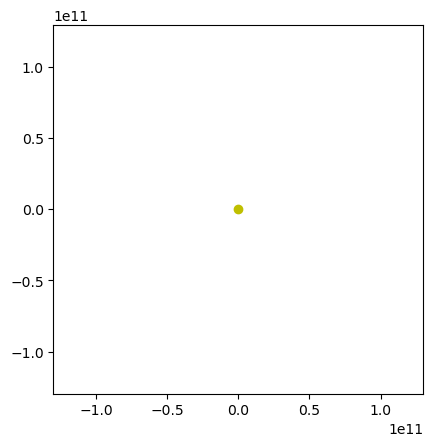

In [389]:
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-1.2 * AU, 1.2 * AU)
ax.set_ylim(-1.2 * AU, 1.2 * AU)
ax.plot(0, 0, 'yo', label="Sun")  # Sun at the origin
planet, = ax.plot([], [], 'bo', label="Venus")  # Planet marker

In [391]:
# Initialize the plot
def init():
    planet.set_data([], [])
    return planet,


In [393]:
def update(frame):
    global position, velocity
    force = gravitational_force(position)
    acceleration = force / mass_venus
    
    velocity += acceleration * dt
    position += velocity * dt
    
    x_positions.append(position[0])
    y_positions.append(position[1])
    
    planet.set_data([position[0]], [position[1]])
    return planet,

In [397]:
ani = FuncAnimation(fig, update, frames=365, init_func=init, blit=True, interval=5)

HTML(ani.to_jshtml())